#### Q1. Define an approach you would take to solve the problem and document it

#### Problem Statement:

The goal is to predict the number of bikes rented in a bike-sharing system based on various features such as date, time, weather conditions, and other relevant factors.

#### Approach:
- Data Understanding
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Selection
- Model Selection
- Model Training and Evaluation
- Model Deployment
- Documentation and Reporting


#### Possible algorithms

- Linear regression
- Decision tree
- Random forest
- Support Vector Machines (SVM)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('bike-sharing-day.csv')

In [4]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [54]:
df.shape

(731, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Data Dictionary 

`instant` A unique identifier for each record.

`dteday` The date of the record.

`season` The season of the year (1: spring, 2: summer, 3: fall, 4: winter).

`yr` The year (0: 2011, 1: 2012).

`mnth` The month of the year.

`holiday` Whether it's a holiday (0: no, 1: yes).

`weekday` The day of the week (0 to 6, where 0 is Sunday).

`workingday` Whether it's a working day (0: no, 1: yes).

`weathersit` The weather situation (1: clear, 2: mist/cloudy, 3: light rain/snow, 4: heavy rain/snow).

`temp` The temperature.

`atemp` The "feels like" temperature.

`hum` The humidity.

`windspeed` The wind speed.

`casual` The number of casual users renting bikes.

`registered` The number of registered users renting bikes.

`cnt` The total count of bike rentals (casual + registered).

In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Observation: There are no null values

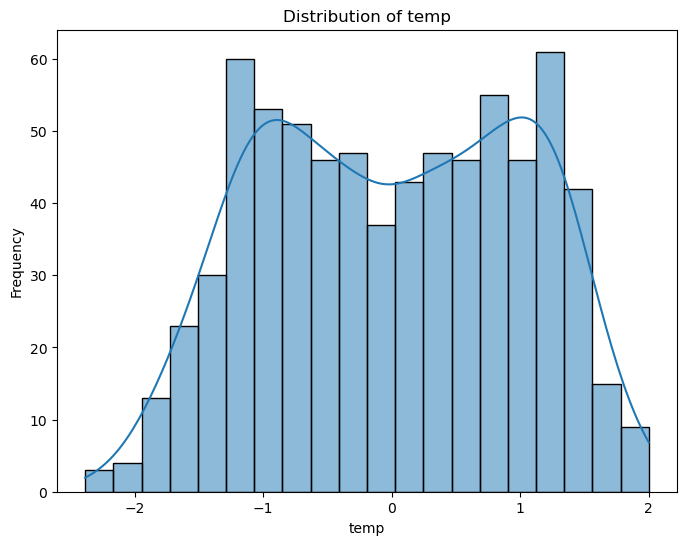

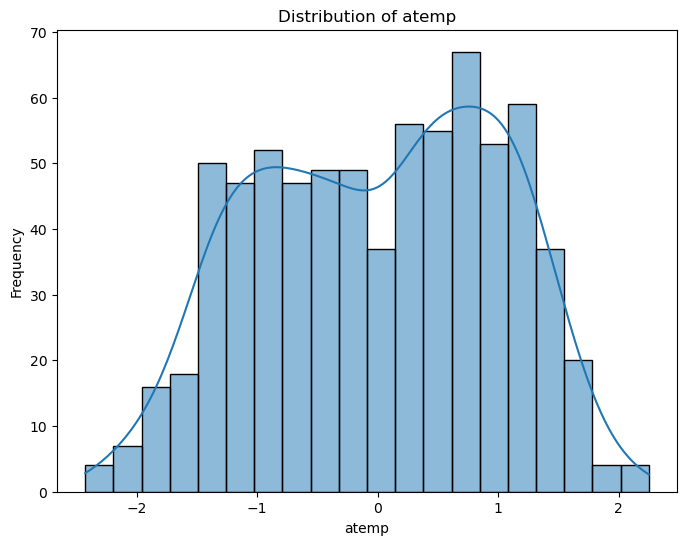

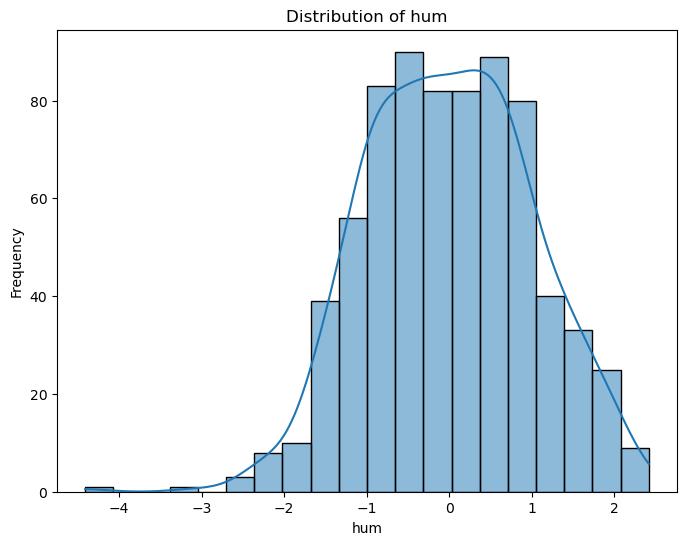

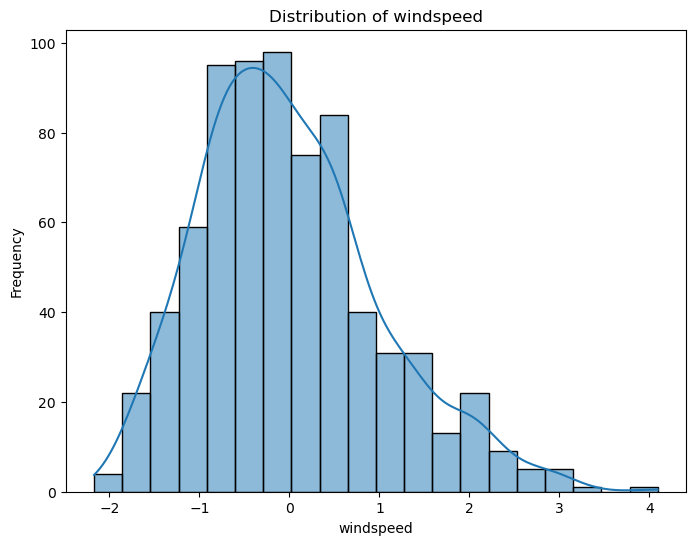

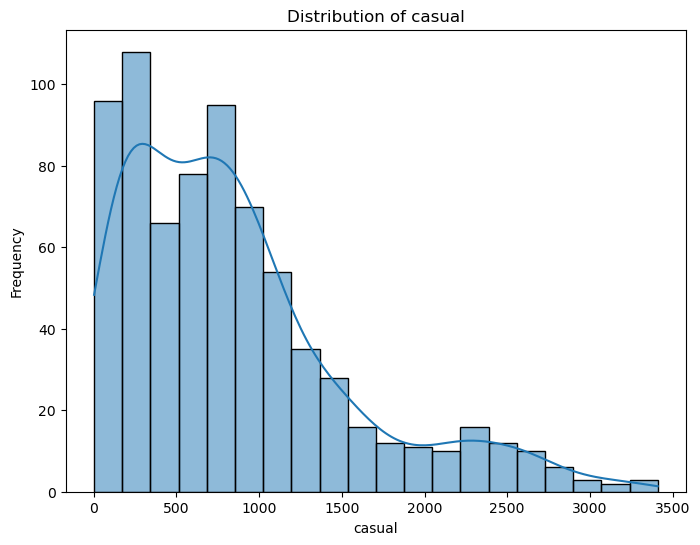

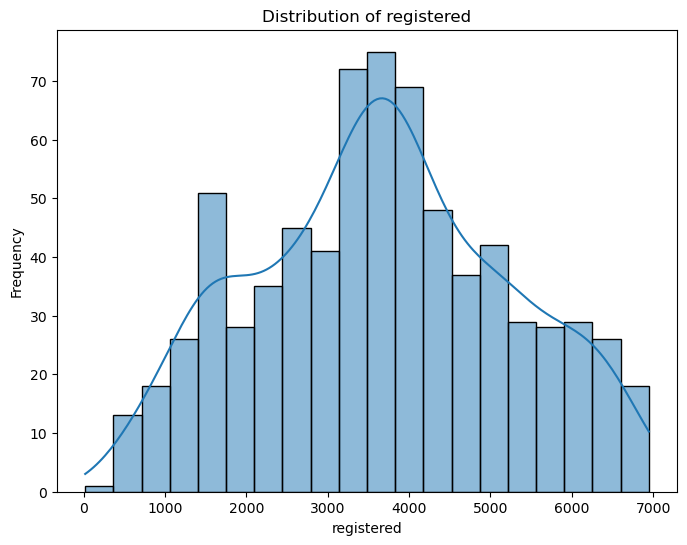

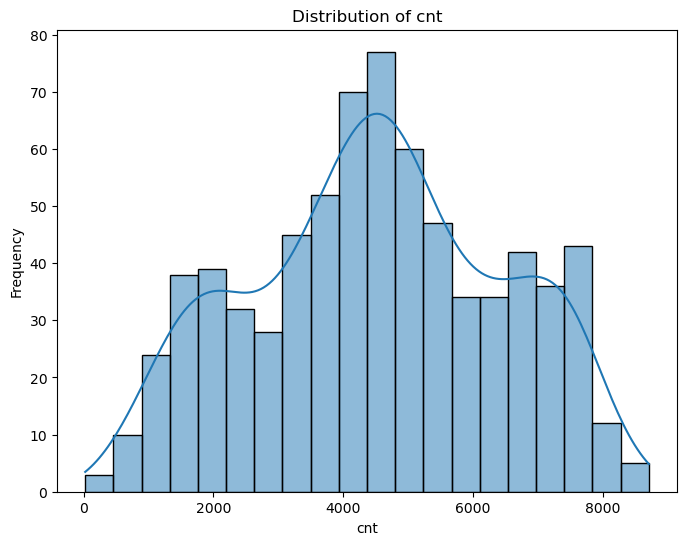

In [64]:
# Explore distributions of numerical variables

numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',]
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sb.histplot(df[var], kde=True, bins=20)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

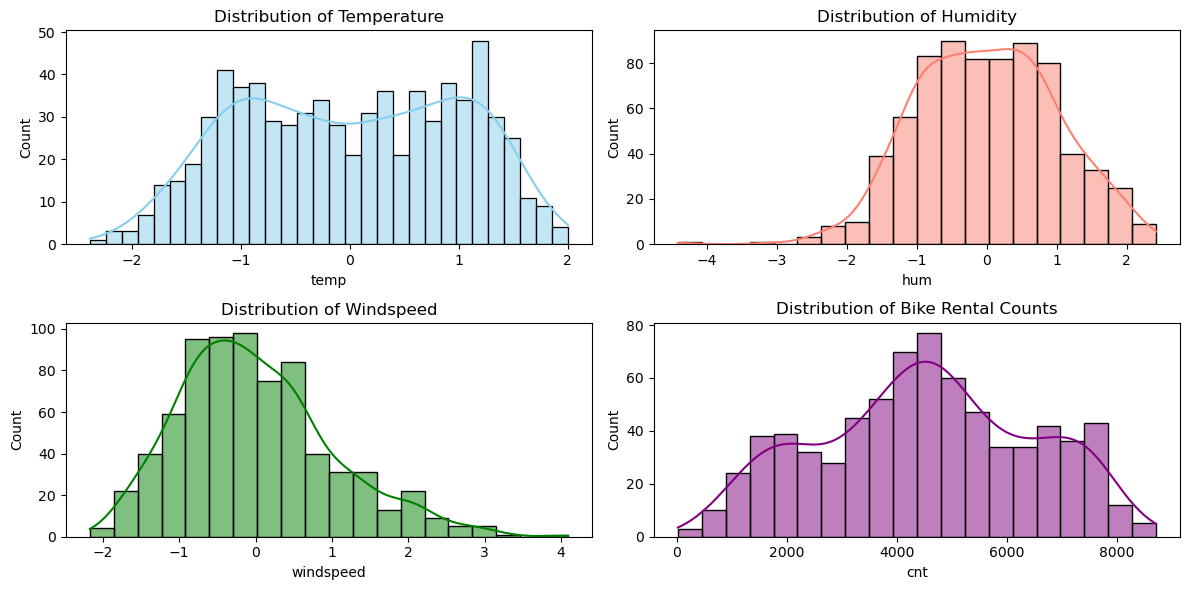

In [97]:
# Visualize distribution of numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sb.histplot(df['temp'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Temperature')

plt.subplot(2, 2, 2)
sb.histplot(df['hum'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Humidity')

plt.subplot(2, 2, 3)
sb.histplot(df['windspeed'], bins=20, kde=True, color='green')
plt.title('Distribution of Windspeed')

plt.subplot(2, 2, 4)
sb.histplot(df['cnt'], bins=20, kde=True, color='purple')
plt.title('Distribution of Bike Rental Counts')

plt.tight_layout()
plt.show()


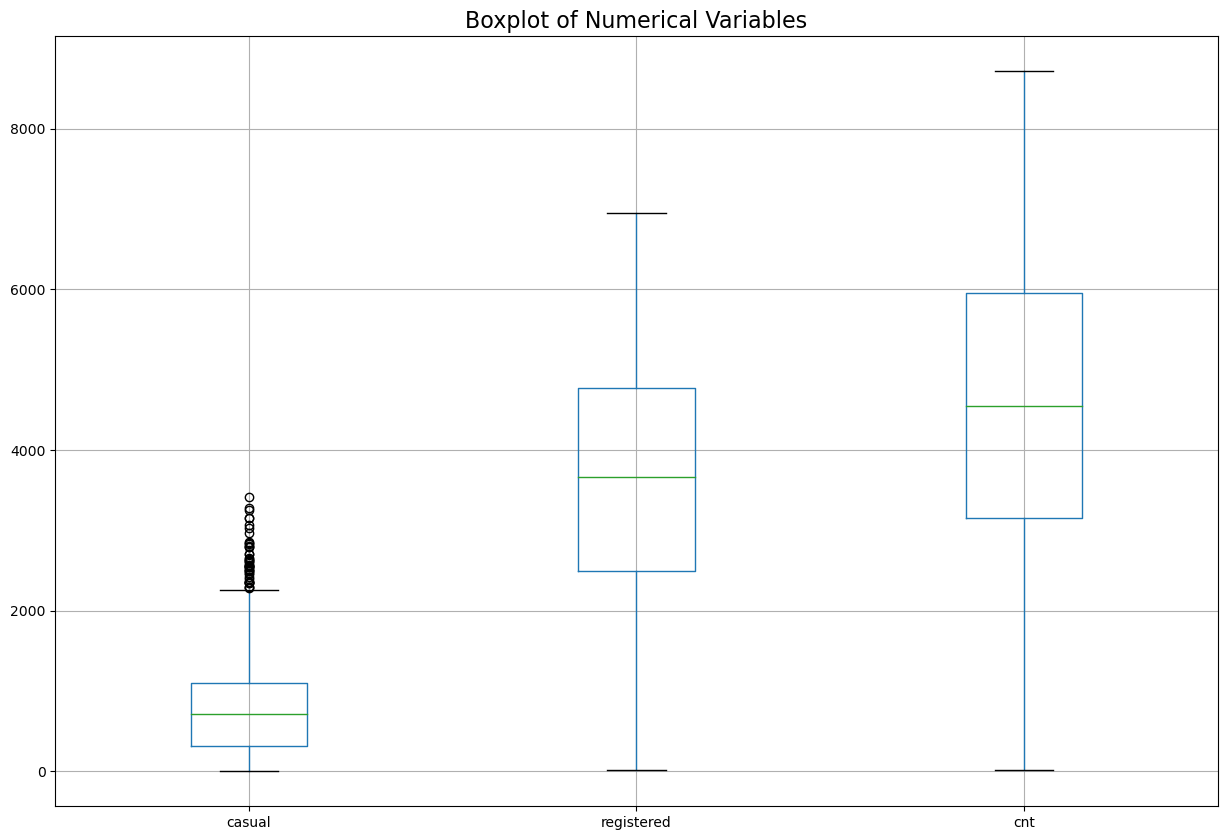

In [78]:
# Box plots to identify outliers
plt.figure(figsize=(15, 10))
df[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Variables', fontsize=16)
plt.show()

C:\Users\iruby\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


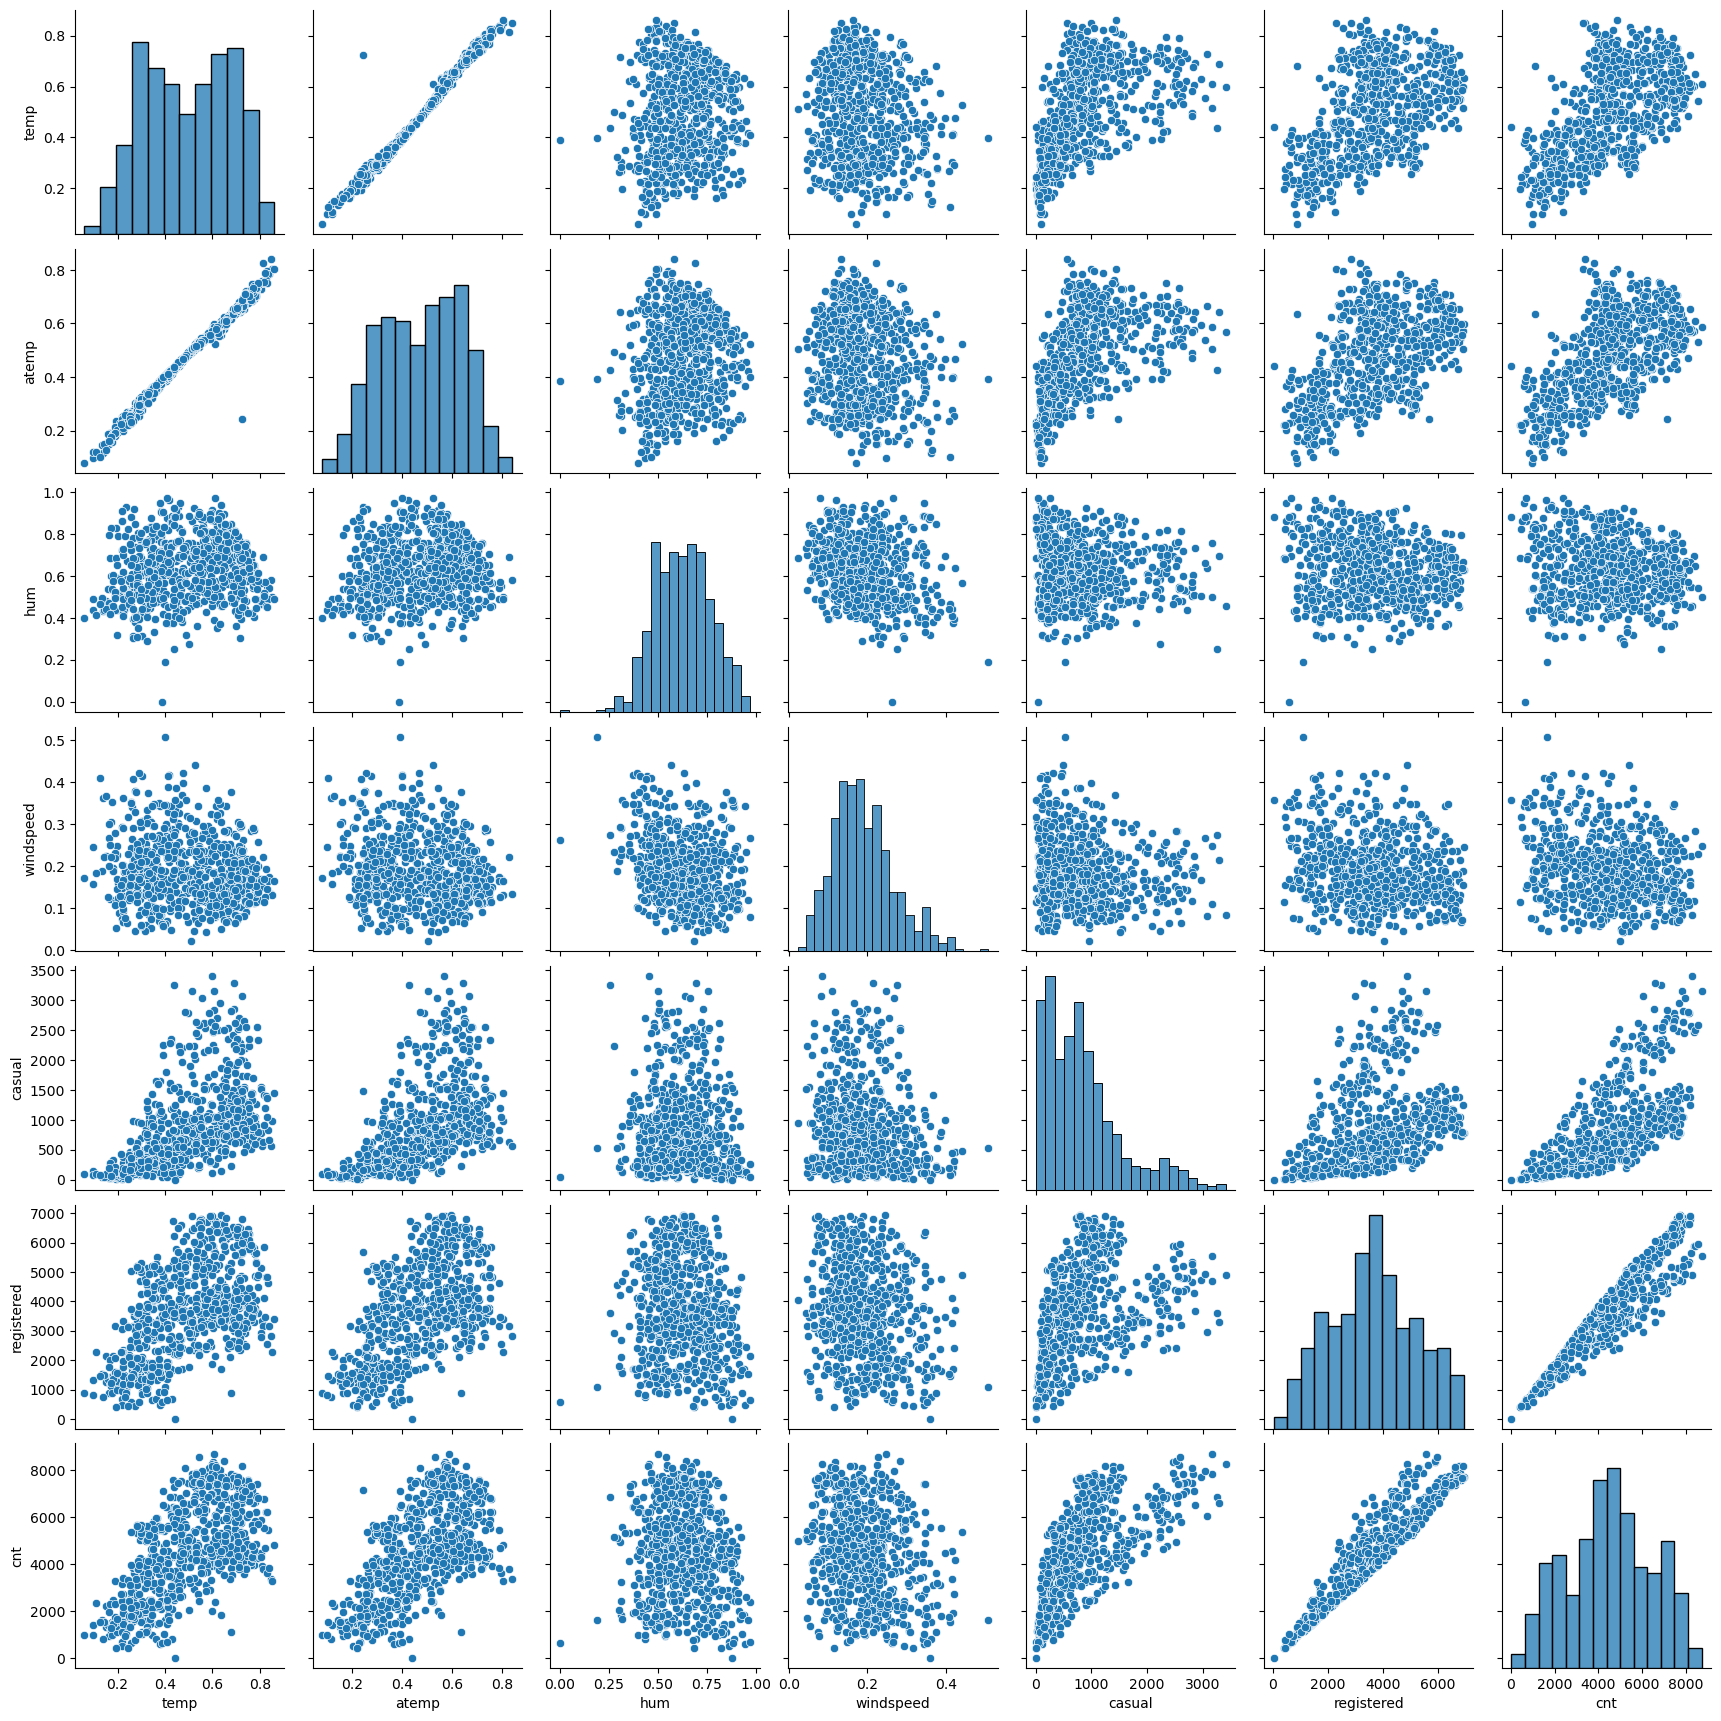

In [11]:
# Pairplot for selected variables

sb.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.show()

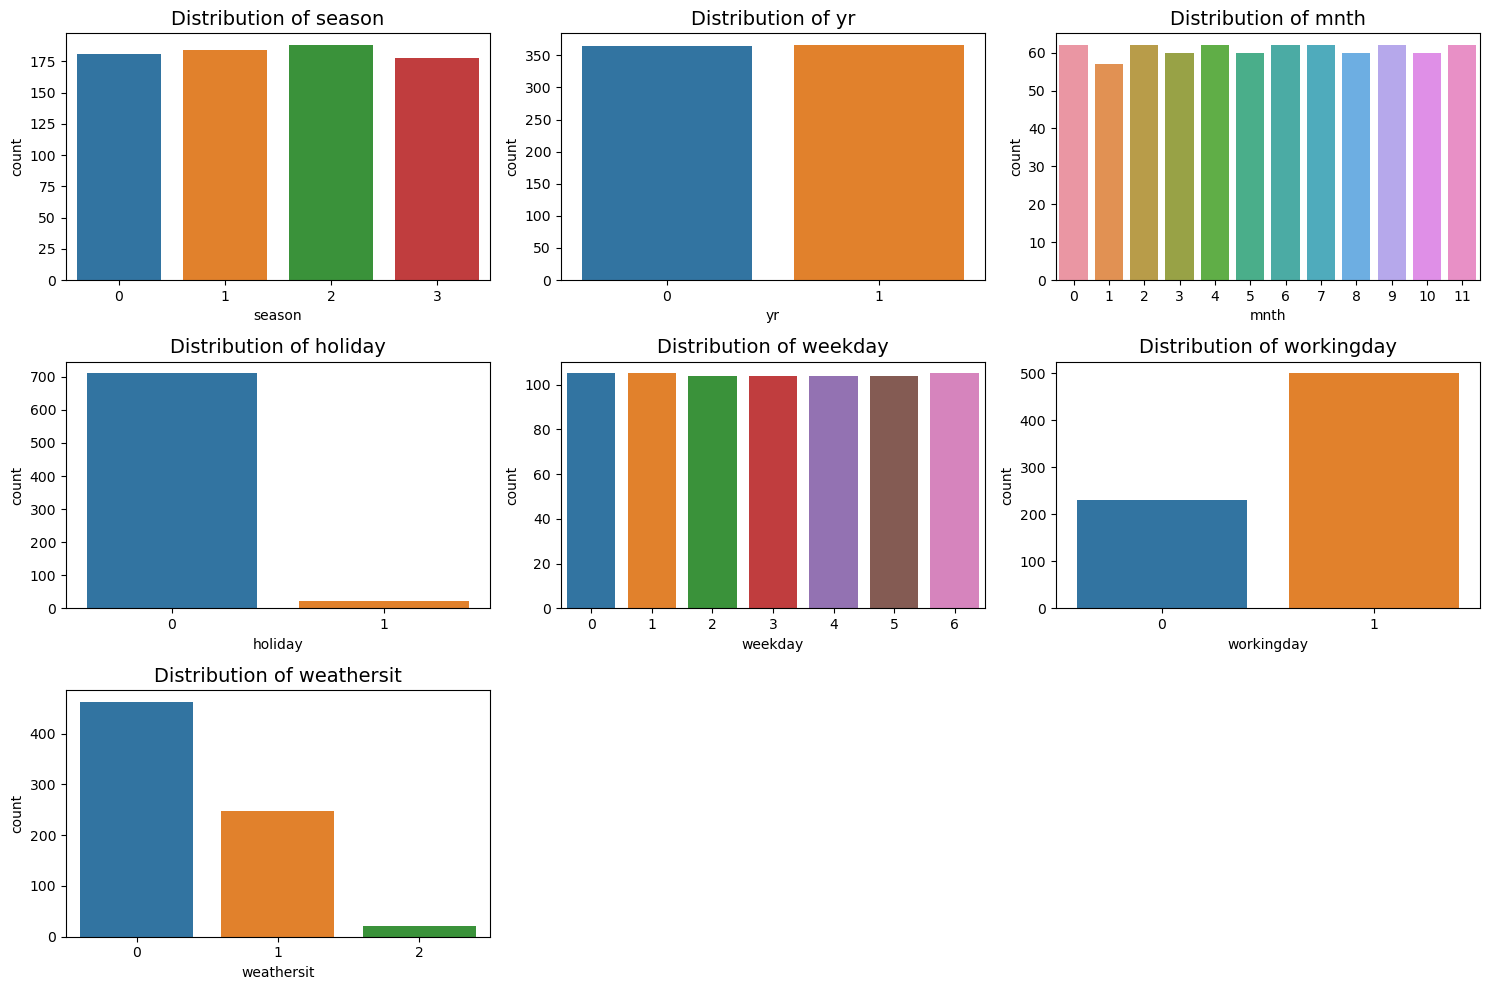

In [76]:
# Distribution of categorical variables
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sb.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', fontsize=14)
plt.tight_layout()
plt.show()

Observations: The bike sharing was extremely low on the holiday season and that of non workingday

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [31]:
# Encode Categorical Variables
# Encoding 'season' and 'weathersit' using LabelEncoder

encoder = LabelEncoder()
df['season'] = encoder.fit_transform(df['season'])
df['weathersit'] = encoder.fit_transform(df['weathersit'])



In [61]:
# Encode categorical variables
# We'll use OneHotEncoder to encode categorical variables
# Identify categorical variables first

categorical_cols = ['holiday', 'weathersit', 'workingday', 'registered', 'casual']



In [20]:
# Scale Numerical Features

scaler = StandardScaler()
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [35]:
# Prepare the data
X = df.drop(['cnt', 'dteday'], axis=1)  # Features
y = df['cnt']  # Target variable


In [37]:
X

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,0,1,0,6,0,1,-0.826662,-0.679946,1.250171,-0.387892,331,654
1,2,0,0,1,0,0,0,1,-0.721095,-0.740652,0.479113,0.749602,131,670
2,3,0,0,1,0,1,1,0,-1.634657,-1.749767,-1.339274,0.746632,120,1229
3,4,0,0,1,0,2,1,0,-1.614780,-1.610270,-0.263182,-0.389829,108,1454
4,5,0,0,1,0,3,1,0,-1.467414,-1.504971,-1.341494,-0.046307,82,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,0,1,12,0,4,1,1,-1.318665,-1.521108,0.175807,2.061426,247,1867
727,728,0,1,12,0,5,1,1,-1.323224,-1.346690,-0.266238,-0.452131,644,2451
728,729,0,1,12,0,6,0,1,-1.323224,-1.424344,0.878392,-0.853552,159,1182
729,730,0,1,12,0,0,0,0,-1.309558,-1.490049,-1.015664,2.069444,364,1432


In [38]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
X_test

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
703,704,3,1,12,0,2,1,0,-0.106884,-0.032545,0.743727,-0.211211,551,6055
33,34,0,0,2,0,4,1,0,-1.686082,-1.820550,-1.335389,1.126812,61,1489
300,301,3,0,10,0,5,1,1,-0.899555,-0.955126,-0.295514,0.503491,456,3291
456,457,1,1,4,0,0,0,1,-0.380219,-0.350427,0.339741,-0.235254,2347,3694
633,634,3,1,9,0,2,1,0,0.298565,0.428770,-0.406755,0.591838,845,6693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,0,0,3,0,6,0,0,-0.908663,-0.912522,-0.234038,0.391101,724,1408
192,193,2,0,7,0,2,1,0,1.633352,1.626783,-0.482866,0.126126,662,3596
328,329,3,0,11,0,5,1,0,-0.658107,-0.575273,0.111401,-1.182653,1095,1697
165,166,1,0,6,0,3,1,0,0.717680,0.696348,-1.097627,-0.291488,769,4411


In [40]:
X_train

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
682,683,3,1,11,0,2,1,1,-0.831221,-0.928028,0.246066,1.957003,327,3767
250,251,2,0,9,0,4,1,2,0.757292,0.497434,2.189752,0.029205,153,1689
336,337,3,0,12,0,6,0,0,-1.072664,-1.005528,-0.105227,-1.222843,706,2908
260,261,2,0,9,0,0,0,0,0.066230,0.099374,0.471476,-0.154990,1353,2921
543,544,2,1,6,0,3,1,0,1.104903,1.022035,-1.882182,1.049635,1077,6258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,0,0,3,0,0,0,0,-0.607005,-0.578834,-0.706119,1.034514,982,1435
106,107,1,0,4,0,0,0,0,-0.211658,-0.175978,-1.042010,1.459229,1558,2186
270,271,3,0,9,0,3,1,1,0.763234,0.619000,1.551700,-0.540478,480,3427
435,436,0,1,3,0,0,0,0,-0.730601,-0.704232,-1.060460,0.414499,1658,3253


In [43]:
# Initialize and train the Random Forest Regression model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [73]:
# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the evaluation results
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R-squared': r2}

# Display the evaluation results
print("Evaluation Results:")
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print()

# Select the model with the best performance based on evaluation metrics
best_model = min(results, key=lambda x: results[x]['MAE'])
print(f"Best Model based on Mean Absolute Error (MAE): {best_model}")

Evaluation Results:
Model: Linear Regression
Mean Absolute Error (MAE): 1.9810366499156343e-12
Mean Squared Error (MSE): 5.312811666516502e-24
R-squared: 1.0

Model: Decision Tree Regression
Mean Absolute Error (MAE): 147.36054421768708
Mean Squared Error (MSE): 43639.4149659864
R-squared: 0.9891170334126186

Model: Random Forest Regression
Mean Absolute Error (MAE): 65.1012244897959
Mean Squared Error (MSE): 10621.243390476191
R-squared: 0.9973512331220505

Best Model based on Mean Absolute Error (MAE): Linear Regression


In [44]:
# Evaluate the trained model on the test dataset
y_pred = random_forest_reg.predict(X_test)


In [46]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Evaluation Metrics:
Mean Absolute Error (MAE): 65.37197278911563
Mean Squared Error (MSE): 10400.910887074831
R-squared (R2): 0.9974061804964481
